Shapes of the data splits:
X_train: (80, 1) y_train: (80,)
X_test: (20, 1) y_test: (20,)


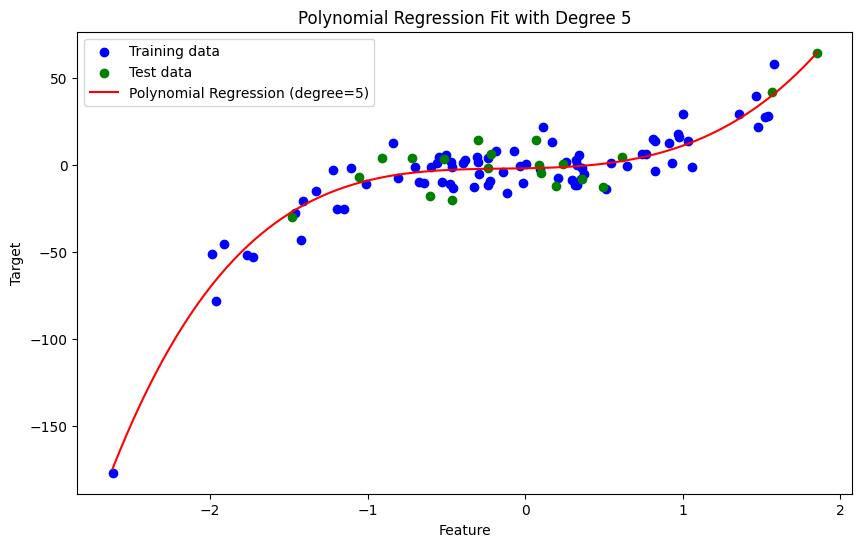

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# Generate synthetic non-linear regression data
np.random.seed(42)
X = np.random.normal(0, 1, 100).reshape(-1, 1)  # Generate 100 random values, reshaped to a column vector
y = (10 * X**3 + np.random.normal(0, 10, 100).reshape(-1, 1)).flatten()  # Ensure `y` matches shape with `X`

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check that both X and y have consistent shapes
print("Shapes of the data splits:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# Create a polynomial regression model with a higher degree (e.g., degree 5)
degree = 5
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

# Generate predictions for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # generate evenly spaced values for smoother curve
y_plot = model.predict(X_plot)

# Plot the data points and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Training data")  # Training data
plt.scatter(X_test, y_test, color="green", label="Test data")  # Test data
plt.plot(X_plot, y_plot, color="red", label=f"Polynomial Regression (degree={degree})")  # Polynomial curve
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Regression Fit with Degree 5")
plt.legend()
plt.show()


Linear Regression Train R^2: 0.6093, Test R^2: 0.5958
Lasso Regression Train R^2: 0.5461, Test R^2: 0.5451
Ridge Regression Train R^2: 0.6093, Test R^2: 0.5958
Linear Regression MSE (Train): 0.5234, MSE (Test): 0.5306
Lasso Regression MSE (Train): 0.6081, MSE (Test): 0.5971
Ridge Regression MSE (Train): 0.5234, MSE (Test): 0.5306
Lasso Regression selected 6 features (non-zero coefficients).
Ridge Regression selected 8 features (non-zero coefficients).


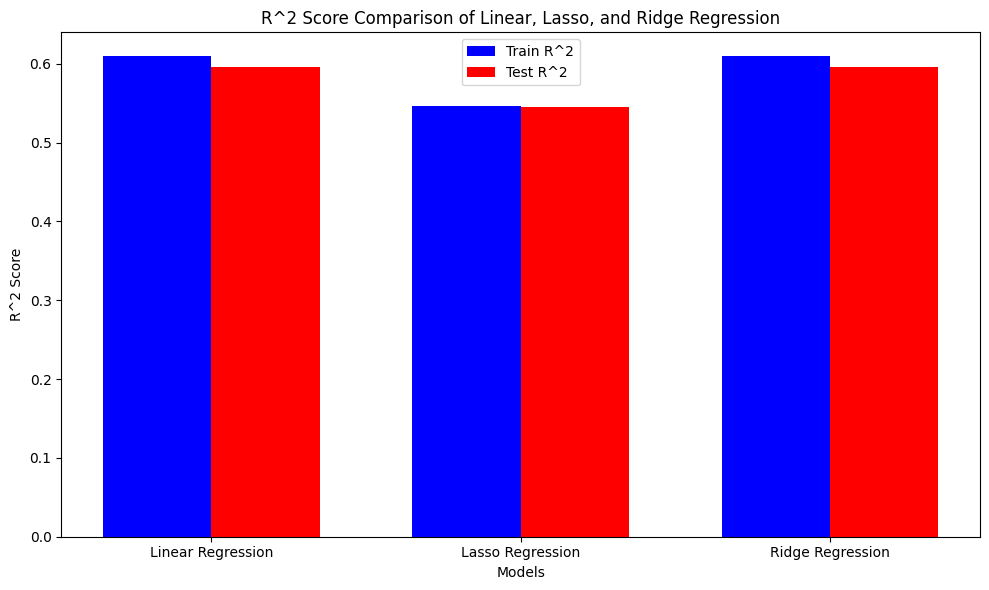

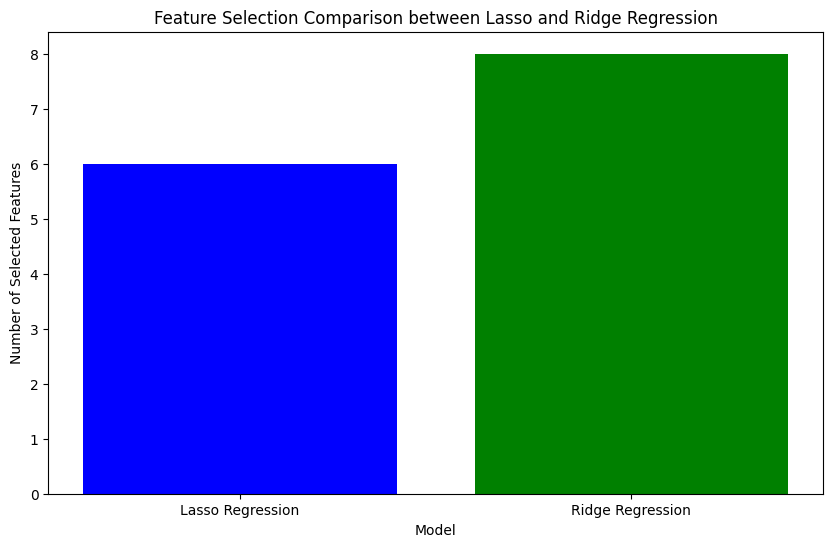

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
lin_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.1)  # Lasso with a small regularization parameter
ridge_reg = Ridge(alpha=0.1)  # Ridge with a standard regularization parameter

# Fit models
lin_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = lin_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate Mean Squared Error and R^2 (train and test scores)
mse_lr_train = mean_squared_error(y_train, lin_reg.predict(X_train))
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
r2_lr_train = lin_reg.score(X_train, y_train)
r2_lr_test = lin_reg.score(X_test, y_test)

mse_lasso_train = mean_squared_error(y_train, lasso_reg.predict(X_train))
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
r2_lasso_train = lasso_reg.score(X_train, y_train)
r2_lasso_test = lasso_reg.score(X_test, y_test)

mse_ridge_train = mean_squared_error(y_train, ridge_reg.predict(X_train))
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge)
r2_ridge_train = ridge_reg.score(X_train, y_train)
r2_ridge_test = ridge_reg.score(X_test, y_test)

# Get the number of features selected (non-zero coefficients)
selected_features_lasso = np.sum(lasso_reg.coef_ != 0)
selected_features_ridge = np.sum(ridge_reg.coef_ != 0)

# Print the results
print(f"Linear Regression Train R^2: {r2_lr_train:.4f}, Test R^2: {r2_lr_test:.4f}")
print(f"Lasso Regression Train R^2: {r2_lasso_train:.4f}, Test R^2: {r2_lasso_test:.4f}")
print(f"Ridge Regression Train R^2: {r2_ridge_train:.4f}, Test R^2: {r2_ridge_test:.4f}")

print(f"Linear Regression MSE (Train): {mse_lr_train:.4f}, MSE (Test): {mse_lr_test:.4f}")
print(f"Lasso Regression MSE (Train): {mse_lasso_train:.4f}, MSE (Test): {mse_lasso_test:.4f}")
print(f"Ridge Regression MSE (Train): {mse_ridge_train:.4f}, MSE (Test): {mse_ridge_test:.4f}")

print(f"Lasso Regression selected {selected_features_lasso} features (non-zero coefficients).")
print(f"Ridge Regression selected {selected_features_ridge} features (non-zero coefficients).")

# Create a bar plot for the R^2 scores
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
train_scores = [r2_lr_train, r2_lasso_train, r2_ridge_train]
test_scores = [r2_lr_test, r2_lasso_test, r2_ridge_test]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

# Plot the train and test scores
bar1 = ax.bar(index, train_scores, bar_width, label='Train R^2', color='b')
bar2 = ax.bar(index + bar_width, test_scores, bar_width, label='Test R^2', color='r')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('R^2 Score')
ax.set_title('R^2 Score Comparison of Linear, Lasso, and Ridge Regression')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Create a bar plot for the feature selection comparison (Lasso vs Ridge)
features = [selected_features_lasso, selected_features_ridge]
models_for_features = ['Lasso Regression', 'Ridge Regression']

plt.figure(figsize=(10, 6))
plt.bar(models_for_features, features, color=['b', 'g'])
plt.xlabel('Model')
plt.ylabel('Number of Selected Features')
plt.title('Feature Selection Comparison between Lasso and Ridge Regression')
plt.show()


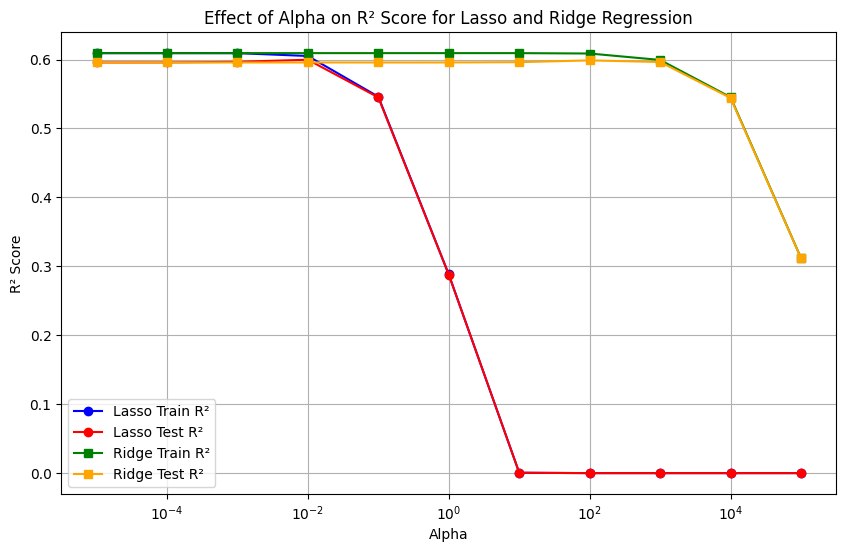

In [14]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for creating the alpha_values array
from sklearn.linear_model import Lasso, Ridge


# Define alpha_values
alpha_values = np.logspace(-5, 5, 11)  # Example: values from 1e-5 to 1e5


# Lasso Performance vs Alpha
lasso_train_scores = []
lasso_test_scores = []
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_train_scores.append(lasso_reg.score(X_train, y_train))
    lasso_test_scores.append(lasso_reg.score(X_test, y_test))

# Ridge Performance vs Alpha
ridge_train_scores = []
ridge_test_scores = []
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_train_scores.append(ridge_reg.score(X_train, y_train))
    ridge_test_scores.append(ridge_reg.score(X_test, y_test))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, lasso_train_scores, label="Lasso Train R²", marker='o', color='b')
plt.plot(alpha_values, lasso_test_scores, label="Lasso Test R²", marker='o', color='r')
plt.plot(alpha_values, ridge_train_scores, label="Ridge Train R²", marker='s', color='g')
plt.plot(alpha_values, ridge_test_scores, label="Ridge Test R²", marker='s', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('Effect of Alpha on R² Score for Lasso and Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()